In [6]:
import numpy as np, pandas as pd, seaborn as sns
import prophet
import matplotlib.pyplot as plt

time series should include autocorrelation, cross correlation, arima, arch, garch, prophet, noise exponents and coefficients, transformers, methods for intermittent signals, detrending, delay time embedding, symbol prediction, and any methods from TDA, as well as Brownian motion, jump processes, GAM

In [4]:
#generate Brownian motion
def random_walk_Brownian(
    mu,
    sigma,
    num_steps,
    S_init,
    dt
):
    path = np.exp((mu - sigma**2/2)* dt + sigma*np.random.normal(0,np.sqrt(dt), size= num_steps))
    return S_init*path.cumprod()




In [29]:
dt = .001
ans = random_walk_Brownian(0,.05,1000,1,dt)

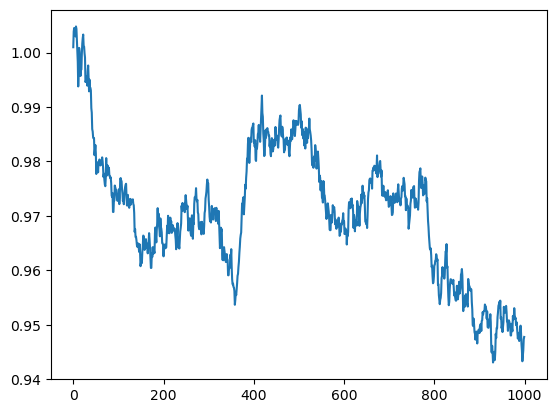

In [30]:
plt.plot(np.arange(len(ans)),ans)

## Correlation, autocorrelation, etc.

In [34]:
from statsmodels.tsa.stattools import acf, ccf

In [31]:
res = acf(ans)

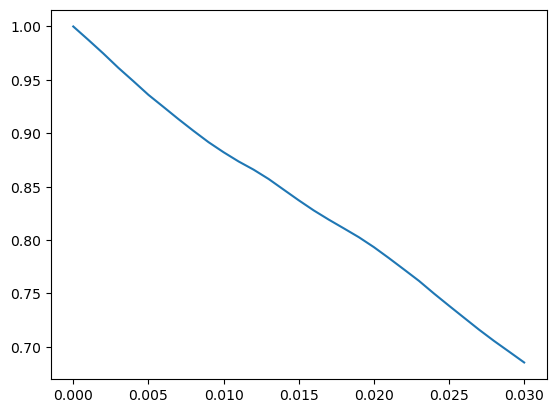

In [32]:
plt.plot(np.arange(len(res))*dt, res)

In [37]:
x = random_walk_Brownian(0,.05,1000,1,dt)
y = random_walk_Brownian(0,.05,1000,1,dt)

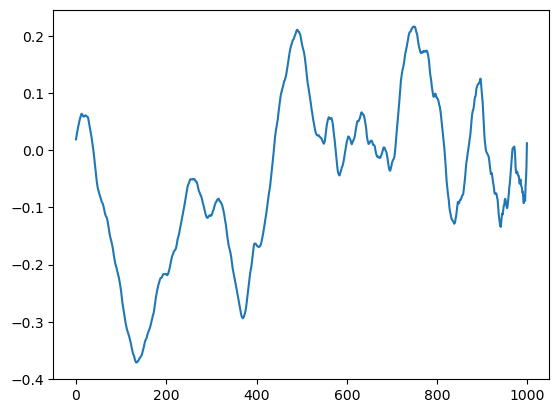

In [38]:
plt.plot(np.arange(len(x)),ccf(x,y))

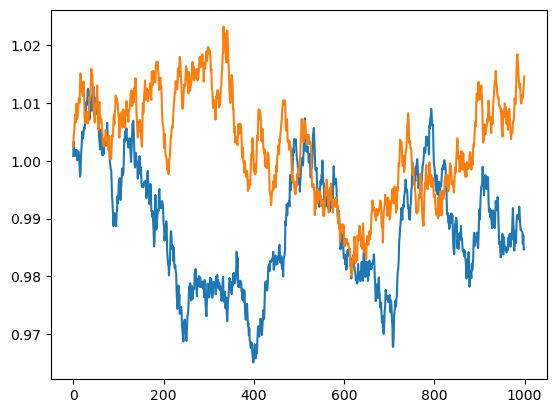

In [39]:
plt.plot(x)
plt.plot(y)

Dilemmas with cross-correlation functions are issues with scaling, which might be mitigated by a cross-covariance function instead (subtracts out the mean)
You might also want a de-trended analysis via something like Prophet

## Prophet

In [40]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

In [41]:
df = pd.read_csv(path)

In [42]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<AxesSubplot:>

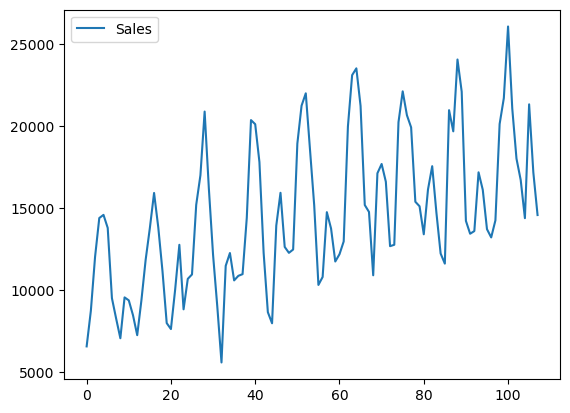

In [44]:
df.plot()

In [47]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [48]:
model = prophet.Prophet()
model.fit(df)

09:32:30 - cmdstanpy - INFO - Chain [1] start processing
09:32:31 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [69]:
future = model.make_future_dataframe(periods=365)

In [70]:
forecast = model.predict(future)

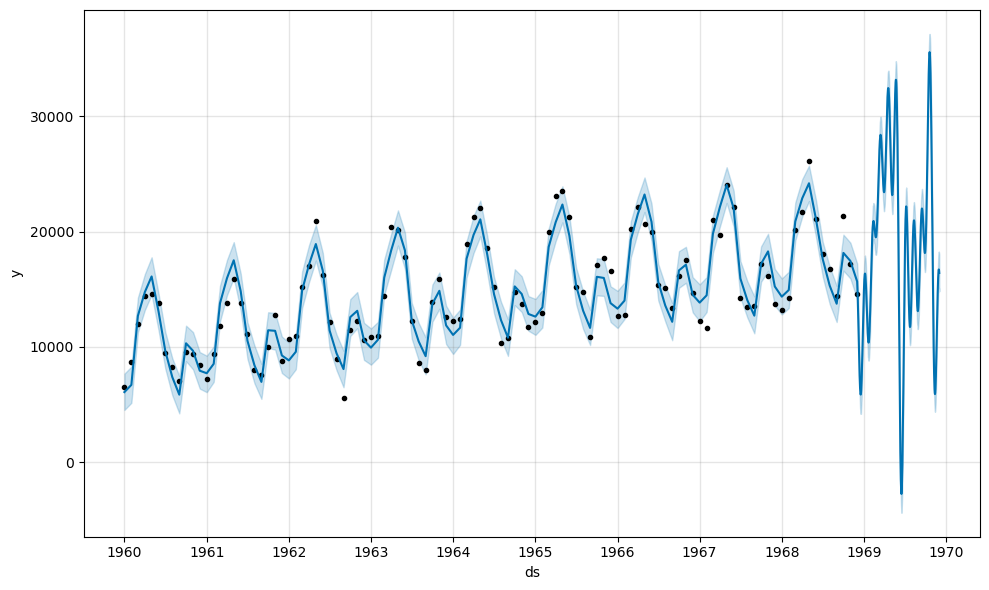

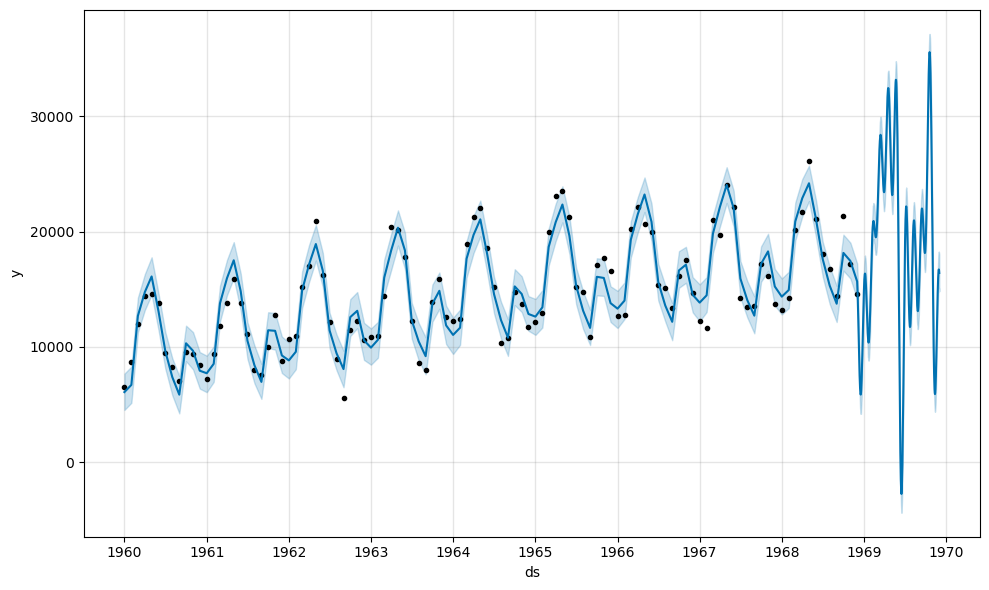

In [71]:
model.plot(forecast)

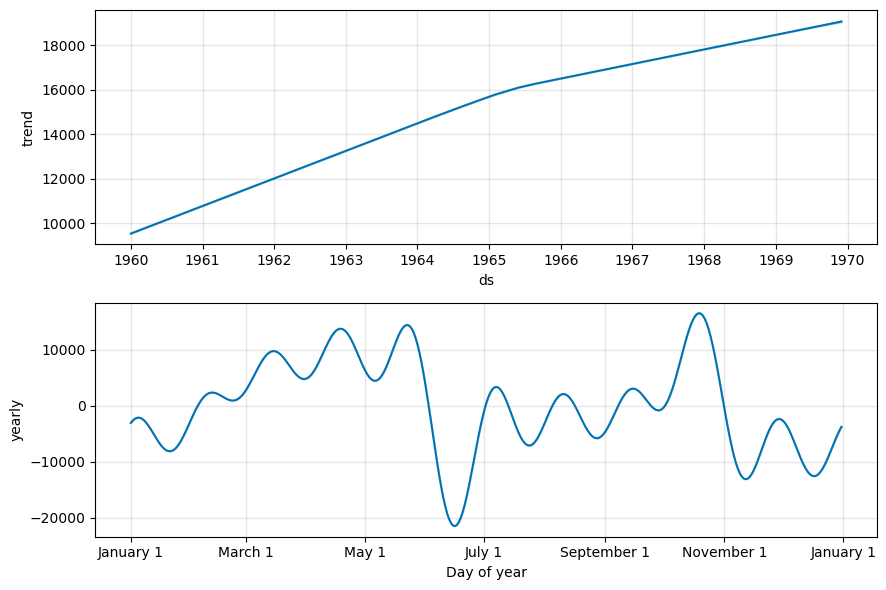

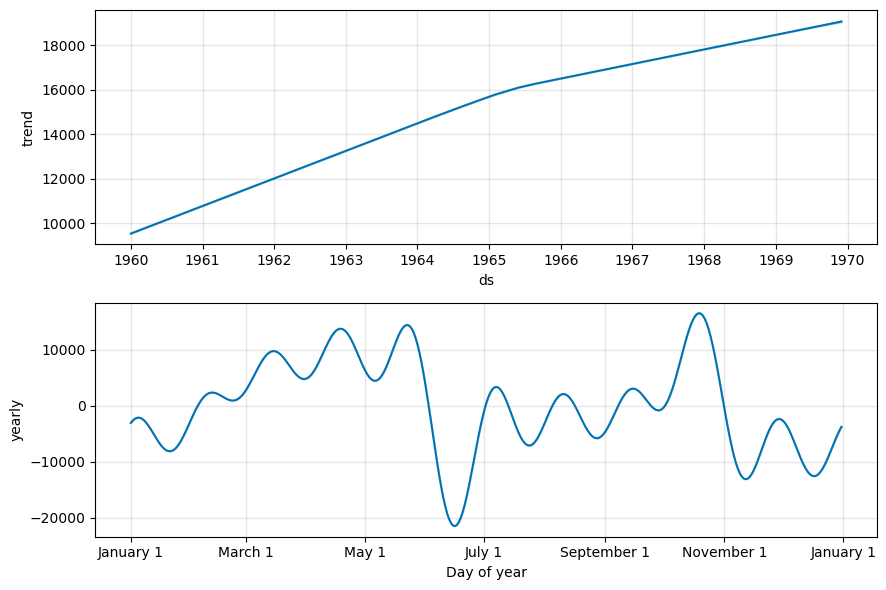

In [74]:
model.plot_components(forecast)

In [76]:
import transformers